In [63]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xar
import matplotlib.pyplot as plt

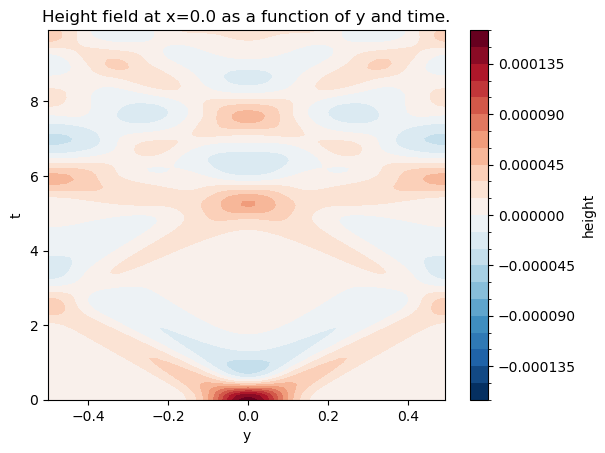

In [64]:
dataset = xar.open_dataset('ds_0.1.nc')

ht = dataset['height']

plt.figure()
ht[:,64,:].plot.contourf(levels=30, cmap='RdBu_r')
plt.title('Height field at x=0.0 as a function of y and time.')
plt.show()

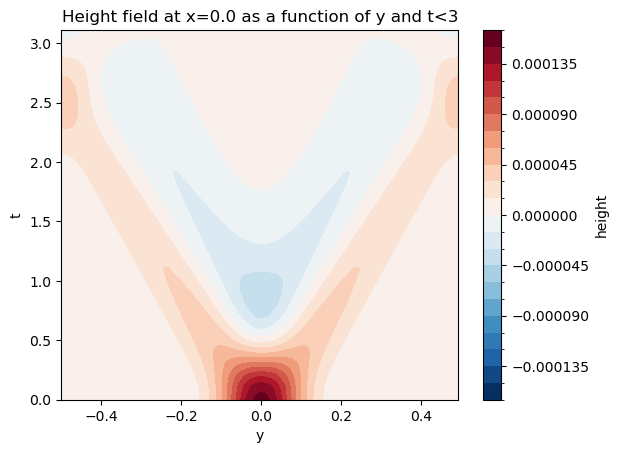

In [65]:
# Zoomed in plot
plt.figure()
ht[:32,64,:].plot.contourf(levels=30, cmap='RdBu_r')
plt.title('Height field at x=0.0 as a function of y and t<3')
plt.show()

In [66]:
# prints out dataset for y=-0.5 and x=0
dataset.height.sel(y=-0.5, x=0)

# For just array:
#dataset.height.sel(y=-0.5, x=0).data

<xarray.DataArray 'height' (t: 100)>
[100 values with dtype=float64]
Coordinates:
    sim_time      (t) float64 ...
    world_time    (t) float64 ...
    wall_time     (t) float64 ...
    timestep      (t) float64 ...
    iteration     (t) int64 ...
    write_number  (t) int64 ...
    x             float64 0.0
    y             float64 -0.5
  * t             (t) float64 0.0 0.11 0.2 0.3 0.4 ... 9.51 9.61 9.71 9.81 9.91

In [67]:
height_values = dataset.height.sel(y=-0.5, x=0)
height_values

<xarray.DataArray 'height' (t: 100)>
[100 values with dtype=float64]
Coordinates:
    sim_time      (t) float64 ...
    world_time    (t) float64 ...
    wall_time     (t) float64 ...
    timestep      (t) float64 ...
    iteration     (t) int64 ...
    write_number  (t) int64 ...
    x             float64 0.0
    y             float64 -0.5
  * t             (t) float64 0.0 0.11 0.2 0.3 0.4 ... 9.51 9.61 9.71 9.81 9.91

In [68]:
# Create turning point function
def turning_points(list):
    dx = np.diff(list)                              # difference not differentiation
    return np.where(dx[1:] * dx[:-1] < 0)           # first element of array

In [69]:
first_tp = turning_points(height_values)[0][0]
print(first_tp)

height_values[first_tp]

24


<xarray.DataArray 'height' ()>
array(3.828036e-05)
Coordinates:
    sim_time      float64 ...
    world_time    float64 ...
    wall_time     float64 ...
    timestep      float64 ...
    iteration     int64 ...
    write_number  int64 ...
    x             float64 0.0
    y             float64 -0.5
    t             float64 2.41

In [70]:
height_values.t[ first_tp ].data

array(2.41)